<a href="https://colab.research.google.com/github/LuanLindolfo/Faculdade/blob/main/Intelig%C3%AAncia_Computacional_Luan_%26_La%C3%ADs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de Classificação
## Visão Computacional
### Lais Sansara & Luan Lindolfo

Algoritmo utilizado diretamente do banco de dados público do
Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis - Ibama com o Governo Federal

Tema: Dados de Produtos e Volumes Explorados em 2024

Objetivo: Aplicar um algoritmo de classificação que correlacione o volume autorizado de exploração com o volume efetivamente explorado, considerando informações sobre produtores e municípios.

Fonte: https://dados.gov.br/dados/conjuntos-dados/volumes-explorados-if-100

In [ ]:
!pip install numpy #para computação numérica, alta performance e ferramentas para operações matemáticas.
!pip -q install plotly #gráficos e dashboards dinâmicos
!pip -q install yellowbrick #visualização de machine learning para avaliar e diagnosticar modelos de forma visual

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#carregando a base de dados do drive pro ambiente do collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
volume = pd.read_csv('/content/drive/MyDrive/Ibama/volume.csv', delimiter=';')
volume

,NRO_REGISTRO,NRO_AUTORIZACAO,DATA_DE_EMISSAO,DATA_DE_VALIDADE,UF,MUNICIPIO,NOME_DETENTOR,CPF_CNPJ_DETENTOR,ATIVIDADE,PRODUTO,...,LATITUDE_ARVORE,LONGITUDE_ARVORE,NOME_CIENTIFICO,NOME_POPULAR,VOLUME_AUTORIZADO,VOLUME_EXPLORADO,DATA_DA_EXPLORACAO,SITUACAO,DATA_DA_SITUACAO,ULTIMA_ATUALIZACAO_RELATORIO
0,22319521,20232202428670,2024-01-10,2025-01-10,CE,TRAIRI,EGQ,053.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,4397.0400,2000.0000,2024-09-18,Autorização Emitida,2024-01-10,2025-07-20 11:35
1,22319624,20232202433970,2024-01-10,2025-01-10,CE,NOVA RUSSAS,FAGBN,641.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,2090.2700,2090.0000,2024-08-04,Autorização Emitida,2024-01-10,2025-07-20 11:35
2,22319609,20232202433137,2024-01-17,2025-01-17,CE,FARIAS BRITO,JDGN,029.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,2871.9400,2871.9400,2024-10-23,Autorização Emitida,2024-01-17,2025-07-20 11:35
3,22319499,20232202427280,2024-01-10,2025-01-10,CE,CANINDE,ASSOCIAÇÃO DOS TRABALHADORES ASSENTADOS DE ARM...,01.025.567/0001-85,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,2772.3700,300.0000,2024-12-20,Autorização Emitida,2024-01-10,2025-07-20 11:35
4,22319517,20232202428378,2024-01-10,2025-01-10,CE,CASCAVEL,JIL,049.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,2009.0100,2009.0100,2024-11-25,Autorização Emitida,2024-01-10,2025-07-20 11:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304072,10119179,10152202436371,2024-04-30,2025-04-30,PA,PORTEL,CEMAL COMERCIO ECOLOGICO DE MADEIRAS LTDA,06.036.051/0002-30,POA (Amazônia Legal) Pleno,Tora(m³),...,"-2,166900","-51,668350",Ocotea cernua,Louro-canelinha,2.9808,2.5248,2024-11-23,Autorização Emitida,2024-04-30,2025-07-20 11:35
304073,10119179,10152202436371,2024-04-30,2025-04-30,PA,PORTEL,CEMAL COMERCIO ECOLOGICO DE MADEIRAS LTDA,06.036.051/0002-30,POA (Amazônia Legal) Pleno,Tora(m³),...,"-2,169752","-51,675143",Ocotea cernua,Louro-canelinha,2.9808,3.8441,2024-11-23,Autorização Emitida,2024-04-30,2025-07-20 11:35
304074,10119179,10152202436371,2024-04-30,2025-04-30,PA,PORTEL,CEMAL COMERCIO ECOLOGICO DE MADEIRAS LTDA,06.036.051/0002-30,POA (Amazônia Legal) Pleno,Tora(m³),...,"-2,175085","-51,663944",Ocotea cernua,Louro-canelinha,3.1198,2.7348,2024-11-23,Autorização Emitida,2024-04-30,2025-07-20 11:35
304075,21418476,20142202442580,2024-10-16,2025-10-16,RR,RORAINOPOLIS,AJO,290.***.***-**,POA (Amazônia Legal) Pleno,Tora(m³),...,",501683","-60,296227",Iryanthera paradoxa,Sangue-de-boi,3.9305,2.7408,2025-01-08,Autorização Emitida,2024-10-16,2025-07-20 11:35


In [ ]:
volume.head(10)

,NRO_REGISTRO,NRO_AUTORIZACAO,DATA_DE_EMISSAO,DATA_DE_VALIDADE,UF,MUNICIPIO,NOME_DETENTOR,CPF_CNPJ_DETENTOR,ATIVIDADE,PRODUTO,...,LATITUDE_ARVORE,LONGITUDE_ARVORE,NOME_CIENTIFICO,NOME_POPULAR,VOLUME_AUTORIZADO,VOLUME_EXPLORADO,DATA_DA_EXPLORACAO,SITUACAO,DATA_DA_SITUACAO,ULTIMA_ATUALIZACAO_RELATORIO
0,22319521,20232202428670,2024-01-10,2025-01-10,CE,TRAIRI,EGQ,053.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,4397.04,2000.00,2024-09-18,Autorização Emitida,2024-01-10,2025-07-20 11:35
1,22319624,20232202433970,2024-01-10,2025-01-10,CE,NOVA RUSSAS,FAGBN,641.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,2090.27,2090.00,2024-08-04,Autorização Emitida,2024-01-10,2025-07-20 11:35
2,22319609,20232202433137,2024-01-17,2025-01-17,CE,FARIAS BRITO,JDGN,029.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,2871.94,2871.94,2024-10-23,Autorização Emitida,2024-01-17,2025-07-20 11:35
3,22319499,20232202427280,2024-01-10,2025-01-10,CE,CANINDE,ASSOCIAÇÃO DOS TRABALHADORES ASSENTADOS DE ARM...,01.025.567/0001-85,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,2772.37,300.00,2024-12-20,Autorização Emitida,2024-01-10,2025-07-20 11:35
4,22319517,20232202428378,2024-01-10,2025-01-10,CE,CASCAVEL,JIL,049.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,2009.01,2009.01,2024-11-25,Autorização Emitida,2024-01-10,2025-07-20 11:35
5,22319617,20232202433611,2024-01-10,2025-01-10,CE,CANINDE,ASSOCIACAO DOS ASSENTADOS DO ASSENTAMENTO DE C...,02.342.554/0001-00,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,8179.01,3300.00,2025-01-15,Autorização Emitida,2024-01-10,2025-07-20 11:35
6,22319448,20232202425712,2024-01-10,2025-01-10,CE,BEBERIBE,JIL,049.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,1017.63,1017.63,2024-11-25,Autorização Emitida,2024-01-10,2025-07-20 11:35
7,22519116,20252202422504,2024-01-18,2025-01-18,PB,SAO JOSE DA LAGOA TAPADA,TFG,025.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,437.75,437.75,2024-05-15,Autorização Emitida,2024-01-18,2025-07-20 11:35
8,22519058,20252202416279,2024-01-18,2025-01-18,PB,DIAMANTE,FSDJ,318.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,1702.88,1700.00,2024-10-29,Autorização Emitida,2024-01-18,2025-07-20 11:35
9,22519121,20252202423415,2024-02-22,2025-02-22,PB,SOUSA,COMERCIO E INDUSTRIA CERAMICA PAPAI JUY LTDA,40.956.179/0001-70,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,1489.00,1489.00,2024-05-21,Autorização Emitida,2024-02-22,2025-07-20 11:35


In [ ]:
volume.tail(10)

,NRO_REGISTRO,NRO_AUTORIZACAO,DATA_DE_EMISSAO,DATA_DE_VALIDADE,UF,MUNICIPIO,NOME_DETENTOR,CPF_CNPJ_DETENTOR,ATIVIDADE,PRODUTO,...,LATITUDE_ARVORE,LONGITUDE_ARVORE,NOME_CIENTIFICO,NOME_POPULAR,VOLUME_AUTORIZADO,VOLUME_EXPLORADO,DATA_DA_EXPLORACAO,SITUACAO,DATA_DA_SITUACAO,ULTIMA_ATUALIZACAO_RELATORIO
304067,10119179,10152202436371,2024-04-30,2025-04-30,PA,PORTEL,CEMAL COMERCIO ECOLOGICO DE MADEIRAS LTDA,06.036.051/0002-30,POA (Amazônia Legal) Pleno,Tora(m³),...,"-2,165859","-51,676853",Ocotea cernua,Louro-canelinha,3.2619,3.1729,2024-11-23,Autorização Emitida,2024-04-30,2025-07-20 11:35
304068,10119179,10152202436371,2024-04-30,2025-04-30,PA,PORTEL,CEMAL COMERCIO ECOLOGICO DE MADEIRAS LTDA,06.036.051/0002-30,POA (Amazônia Legal) Pleno,Tora(m³),...,"-2,168291","-51,680057",Ocotea cernua,Louro-canelinha,3.2619,1.4515,2024-11-23,Autorização Emitida,2024-04-30,2025-07-20 11:35
304069,10119179,10152202436371,2024-04-30,2025-04-30,PA,PORTEL,CEMAL COMERCIO ECOLOGICO DE MADEIRAS LTDA,06.036.051/0002-30,POA (Amazônia Legal) Pleno,Tora(m³),...,"-2,168802","-51,680754",Ocotea cernua,Louro-canelinha,5.2045,7.4532,2024-11-23,Autorização Emitida,2024-04-30,2025-07-20 11:35
304070,10119179,10152202436371,2024-04-30,2025-04-30,PA,PORTEL,CEMAL COMERCIO ECOLOGICO DE MADEIRAS LTDA,06.036.051/0002-30,POA (Amazônia Legal) Pleno,Tora(m³),...,"-2,184404","-51,653600",Ocotea cernua,Louro-canelinha,4.5084,8.2974,2024-11-23,Autorização Emitida,2024-04-30,2025-07-20 11:35
304071,10119179,10152202436371,2024-04-30,2025-04-30,PA,PORTEL,CEMAL COMERCIO ECOLOGICO DE MADEIRAS LTDA,06.036.051/0002-30,POA (Amazônia Legal) Pleno,Tora(m³),...,"-2,189008","-51,657967",Ocotea cernua,Louro-canelinha,4.1786,4.6586,2024-11-23,Autorização Emitida,2024-04-30,2025-07-20 11:35
304072,10119179,10152202436371,2024-04-30,2025-04-30,PA,PORTEL,CEMAL COMERCIO ECOLOGICO DE MADEIRAS LTDA,06.036.051/0002-30,POA (Amazônia Legal) Pleno,Tora(m³),...,"-2,166900","-51,668350",Ocotea cernua,Louro-canelinha,2.9808,2.5248,2024-11-23,Autorização Emitida,2024-04-30,2025-07-20 11:35
304073,10119179,10152202436371,2024-04-30,2025-04-30,PA,PORTEL,CEMAL COMERCIO ECOLOGICO DE MADEIRAS LTDA,06.036.051/0002-30,POA (Amazônia Legal) Pleno,Tora(m³),...,"-2,169752","-51,675143",Ocotea cernua,Louro-canelinha,2.9808,3.8441,2024-11-23,Autorização Emitida,2024-04-30,2025-07-20 11:35
304074,10119179,10152202436371,2024-04-30,2025-04-30,PA,PORTEL,CEMAL COMERCIO ECOLOGICO DE MADEIRAS LTDA,06.036.051/0002-30,POA (Amazônia Legal) Pleno,Tora(m³),...,"-2,175085","-51,663944",Ocotea cernua,Louro-canelinha,3.1198,2.7348,2024-11-23,Autorização Emitida,2024-04-30,2025-07-20 11:35
304075,21418476,20142202442580,2024-10-16,2025-10-16,RR,RORAINOPOLIS,AJO,290.***.***-**,POA (Amazônia Legal) Pleno,Tora(m³),...,",501683","-60,296227",Iryanthera paradoxa,Sangue-de-boi,3.9305,2.7408,2025-01-08,Autorização Emitida,2024-10-16,2025-07-20 11:35
304076,21418476,20142202442580,2024-10-16,2025-10-16,RR,RORAINOPOLIS,AJO,290.***.***-**,POA (Amazônia Legal) Pleno,Tora(m³),...,",517733","-60,294122",Xylopia polyantha,Embira-cheirosa,1.4260,2.7635,2024-12-21,Autorização Emitida,2024-10-16,2025-07-20 11:35


In [ ]:
volume.describe()

,NRO_REGISTRO,NRO_AUTORIZACAO,VOLUME_AUTORIZADO,VOLUME_EXPLORADO
count,3.040770e+05,3.040770e+05,304077.000000,304077.000000
mean,1.888310e+07,1.798050e+13,10.699825,8.235797
std,4.591712e+06,4.103173e+12,631.452526,175.615820
min,1.011906e+07,1.011220e+13,0.161000,0.180600
25%,2.111898e+07,2.011220e+13,3.177200,2.859100
50%,2.111924e+07,2.011220e+13,4.425100,4.166000
75%,2.131943e+07,2.013220e+13,6.648100,6.457000
max,2.313483e+07,2.031220e+13,317034.120000,34950.000000


In [ ]:
#vendo o dado com o maior volume autorizado de exploração
volume[volume['VOLUME_AUTORIZADO']>= 317034.120000]

,NRO_REGISTRO,NRO_AUTORIZACAO,DATA_DE_EMISSAO,DATA_DE_VALIDADE,UF,MUNICIPIO,NOME_DETENTOR,CPF_CNPJ_DETENTOR,ATIVIDADE,PRODUTO,...,LATITUDE_ARVORE,LONGITUDE_ARVORE,NOME_CIENTIFICO,NOME_POPULAR,VOLUME_AUTORIZADO,VOLUME_EXPLORADO,DATA_DA_EXPLORACAO,SITUACAO,DATA_DA_SITUACAO,ULTIMA_ATUALIZACAO_RELATORIO
105,21319295,20132202420257,2024-06-07,2026-05-16,AM,SILVES,MIL MADEIRAS PRECIOSAS LTDA.,04.193.033/0001-56,POA (Amazônia Legal) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,317034.12,16000.0,2024-08-24,Autorização Emitida,2025-01-31,2025-07-20 11:35


In [ ]:
#vendo o dado com o maior volume, explorado
volume[volume['VOLUME_EXPLORADO']>= 34950.000000]

,NRO_REGISTRO,NRO_AUTORIZACAO,DATA_DE_EMISSAO,DATA_DE_VALIDADE,UF,MUNICIPIO,NOME_DETENTOR,CPF_CNPJ_DETENTOR,ATIVIDADE,PRODUTO,...,LATITUDE_ARVORE,LONGITUDE_ARVORE,NOME_CIENTIFICO,NOME_POPULAR,VOLUME_AUTORIZADO,VOLUME_EXPLORADO,DATA_DA_EXPLORACAO,SITUACAO,DATA_DA_SITUACAO,ULTIMA_ATUALIZACAO_RELATORIO
50,22219063,20222202433390,2024-05-08,2025-05-08,PI,SAO JOSE DO PEIXE,CARVAO UNIVERSAL LTDA,30.630.491/0001-15,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,75045.4616,34950.0,2025-05-08,Autorização Emitida,2024-05-08,2025-07-20 11:35


In [ ]:
np.unique(volume['VOLUME_AUTORIZADO'], return_counts=True)

(array([1.61000000e-01, 3.03300000e-01, 3.70000000e-01, ...,
        4.12118010e+04, 7.50454616e+04, 3.17034120e+05]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [ ]:
np.unique(volume['VOLUME_EXPLORADO'], return_counts=True)

(array([1.80600e-01, 2.19800e-01, 2.19900e-01, ..., 3.22800e+04,
        3.26118e+04, 3.49500e+04]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [ ]:
np.unique(volume['MUNICIPIO'], return_counts=True)

(array(['ACOPIARA', 'AIUABA', 'AIURUOCA', "ALTA FLORESTA D'OESTE",
        'ALTO SANTO', "ALVORADA D'OESTE", 'ANDRELANDIA', 'ANISIO DE ABREU',
        'ANTONINA DO NORTE', 'APUI', 'ARACATI', 'ARACOIABA', 'ARIQUEMES',
        'BAEPENDI', 'BANABUIU', 'BARREIRA', 'BEBERIBE', 'BELTERRA',
        'BETANIA', 'BOCA DO ACRE', 'BUJARI', 'CABECEIRAS DO PIAUI',
        'CACAULANDIA', 'CAMPANHA', 'CANDEIAS DO JAMARI', 'CANINDE',
        'CANUTAMA', 'CARACARAI', 'CARIDADE', 'CARIRE', 'CARIUS', 'CAROEBE',
        'CARRANCAS', 'CARVALHOS', 'CASCAVEL', 'CASTANHEIRAS', 'CAUCAIA',
        'CAXINGO', 'CHORO', 'CHUPINGUAIA', 'COCAL DE TELHA',
        'COSTA MARQUES', 'CRATEUS', 'CRATO', 'CRISTINA', 'CRISTINO CASTRO',
        'CROATA', 'CUJUBIM', 'CURACA', 'DESTERRO', 'DIAMANTE', 'EMAS',
        "ESPIGAO D'OESTE", 'EXU', 'FARIAS BRITO', 'FARO', 'FEIJO',
        'FERREIRA GOMES', 'FONTE BOA', 'FORQUILHA', 'GENERAL SAMPAIO',
        'GOVERNADOR DIX-SEPT ROSADO', 'HIDROLANDIA', 'HUMAITA',
        'IBARETAMA',

In [ ]:
np.unique(volume['UF'], return_counts=True)

(array(['AC', 'AM', 'AP', 'BA', 'CE', 'MG', 'PA', 'PB', 'PE', 'PI', 'RN',
        'RO', 'RR'], dtype=object),
 array([ 22700,  56151,  38042,      1,    177,     29,  59274,      6,
            15,     13,      7, 113891,  13771]))

In [ ]:
np.unique(volume['PRODUTO'], return_counts=True)

(array(['Escoramento(m³)', 'Estacas(m³)', 'Lenha(m³)', 'Lenha(st)',
        'Mourões(m³)', 'Tora(m³)', 'Toretes(m³)'], dtype=object),
 array([     3,     72,     31,    158,     12, 303698,    103]))

(array([1.83000e+02, 1.13891e+05, 2.90000e+01, 1.50000e+01, 1.30000e+01,
        5.61580e+04, 1.00000e+00, 5.92740e+04, 1.37710e+04, 6.07420e+04]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

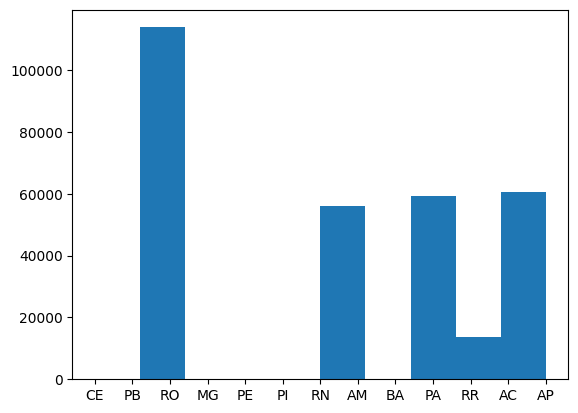

In [ ]:
plt.hist(x = volume['UF'])

(array([1.58000e+02, 3.10000e+01, 0.00000e+00, 3.03698e+05, 0.00000e+00,
        1.03000e+02, 7.20000e+01, 0.00000e+00, 1.20000e+01, 3.00000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

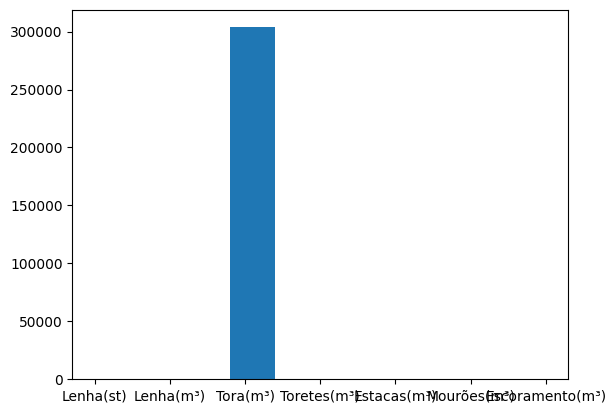

In [ ]:
plt.hist(volume['PRODUTO'])